In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib.style import use 

In [2]:
from data_types import AuthorsDB
from data_types import PublicationsDB
from data_types import AbstractsDB


## Load Data

In [3]:
audb = AuthorsDB()
audb.load()
pubdb = PublicationsDB()
pubdb.load()
absdb = AbstractsDB()
absdb.load()

filename = "../data/mnid_author_dict.pkl"
with open(filename,'rb') as inp:
    authors_dict = pickle.load(inp)

# EDA

Plan for the EDA to answer these questions:
- How many authors are we trying to get and how many have we already received?
- How many papers abstracts we already received?
- What are distributions by years: 
  - published papers
  - ?
- What are distributions by author:
  - number of papers,
  - number of coauthors,
  - ?

# 1 Simple questions about data 
Count All and None values

## 1.1 Databases  

### 1.1.1 Authors data structures
 - authors_dict - Name and mathnet_id
 - audb - Author and his papers

In [4]:

for item in list(authors_dict.items())[:5]:    
    print(item)

('29400', 'Абалакин Илья Владимирович')
('25875', 'Авдуевский Всеволод Сергеевич')
('79709', 'Агапов Владимир Михайлович')
('37981', 'Агафонов С И')
('39797', 'Агаян В М')


In [5]:
mn_id = "29400"
for ind, item in enumerate(audb.db['29400']):
    if ind < 4:
        print(ind)
        print(item)
        print(audb.db['29400'][item])    

0
mm4353
{'year': '2022', 'nrf': 2}
1
mm4312
{'year': '2021', 'nrf': 2}
2
zvmmf11279
{'year': '2021', 'nrf': 1}
3
crm838
{'year': '2020', 'nrf': 1}


Number of authors

In [6]:
print(f"Number of received authors {len(audb.db.keys())}")
print(f"Number of authors in list  {len(authors_dict.keys())}")
print(f"Percent of received authors = {round(100*(len(audb.db.keys())/len(authors_dict.keys())),1)}%")

Number of received authors 871
Number of authors in list  871
Percent of received authors = 100.0%


### 1.1.2 Pandas DataFrame with main publication info

In [7]:
pub = pd.DataFrame.from_dict(pubdb.db,orient='index')

In [8]:
# pubdb.db['vyurv1']['reference'] = 'А. А. Бондаренко, М. В. Якобовский, “Моделирование отказов в высокопроизводительных вычислительных системах в рамках стандарта MPI и его расширения ULFM”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 4:3 (2015), 5–12'
# pubdb.db['vyurv213']['reference'] = 'А. А. Бондаренко, П. А. Ляхов, М. В. Якобовский, “Координированное сохранение с журналированием передаваемых данных и асинхронное восстановление в случае отказа”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 8:2 (2019), 76–91'
# pubdb.db['vyurv46']['reference'] = 'А. А. Бондаренко, М. В. Якобовский, “Обеспечение отказоустойчивости высокопроизводительных вычислений с помощью локальных контрольных точек”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 3:3 (2014),  20–36'

In [9]:
# print(pubdb.db['vyurv1']['reference'])

In [10]:
# pubdb.save()

In [11]:
pub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7597 entries, vyurv213 to vmumm4420
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  7597 non-null   object
 1   doi        1624 non-null   object
 2   udk        3119 non-null   object
 3   send       2844 non-null   object
 4   type       5398 non-null   object
 5   reference  7597 non-null   object
 6   by         7081 non-null   object
 7   paper      7081 non-null   object
 8   jour       7025 non-null   object
 9   yr         7081 non-null   object
 10  vol        4534 non-null   object
 11  issue      4605 non-null   object
 12  pages      4707 non-null   object
dtypes: object(13)
memory usage: 830.9+ KB


In [12]:
# pub.loc['vyurv1']['reference'] = 'А. А. Бондаренко, М. В. Якобовский, “Моделирование отказов в высокопроизводительных вычислительных системах в рамках стандарта MPI и его расширения ULFM”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 4:3 (2015), 5–12'
# pub.loc['vyurv213']['reference'] = 'А. А. Бондаренко, П. А. Ляхов, М. В. Якобовский, “Координированное сохранение с журналированием передаваемых данных и асинхронное восстановление в случае отказа”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 8:2 (2019), 76–91'
# pub.loc['vyurv46']['reference'] = 'А. А. Бондаренко, М. В. Якобовский, “Обеспечение отказоустойчивости высокопроизводительных вычислений с помощью локальных контрольных точек”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 3:3 (2014),  20–36'

In [13]:
pub.head()

,author_id,doi,udk,send,type,reference,by,paper,jour,yr,vol,issue,pages
vyurv213,"[113970, 148811, 22428]","<a class=""SLink"" href=""https://doi.org/10.1452...",004.052.3,20.11.2018,Статья,"А. А. Бондаренко, П. А. Ляхов, М. В. Якобовски...","А.~А.~Бондаренко, П.~А.~Ляхов, М.~В.~Якобовский",Координированное сохранение с журналированием ...,Вестн. ЮУрГУ. Сер. Выч. матем. информ.,2019,8,2,76--91
vyurv1,"[113970, 22428]","<a class=""SLink"" href=""https://doi.org/10.1452...",004.052.3,13.04.2015,Статья,"А. А. Бондаренко, М. В. Якобовский, “Моделиров...","А.~А.~Бондаренко, М.~В.~Якобовский",Моделирование отказов в высокопроизводительных...,Вестн. ЮУрГУ. Сер. Выч. матем. информ.,2015,4,3,5--12
vyurv46,"[113970, 22428]",None,004.052.3,05.08.2014,Статья,"А. А. Бондаренко, М. В. Якобовский, “Обеспечен...","А.~А.~Бондаренко, М.~В.~Якобовский",Обеспечение отказоустойчивости высокопроизводи...,Вестн. ЮУрГУ. Сер. Выч. матем. информ.,2014,3,3,20--36
ipmp2988,"[25339, 26426, 31779, 26427]",:https://doi.org/10.20948/prepr-2021-71,None,None,Препринт,"С. В. Поляков, М. А. Трапезникова, А. Г. Чурба...","С.~В.~Поляков, М.~А.~Трапезникова, А.~Г.~Чурба...",Расчет несжимаемых течений в системе &lt;&lt;п...,Препринты ИПМ им.~М.~В.~Келдыша,2021,None,None,None
ipmp2939,"[101245, 25339, 163334]",:https://doi.org/10.20948/prepr-2021-21,None,None,Препринт,"Б. Г. Фрейнкман, С. В. Поляков, И. О. Толстов,...","Б.~Г.~Фрейнкман, С.~В.~Поляков, И.~О.~Толстов",Расчет основного состояния электрона в неоднор...,Препринты ИПМ им.~М.~В.~Келдыша,2021,None,None,None


In [14]:
for ind, row in pub.iterrows():
    if len(row['reference'])==0:
        print(ind)

In [15]:
# print(pub.loc['ipmp2988']['reference'])

In [16]:
# pub.loc['vyurv1']['reference'] = 'А. А. Бондаренко, М. В. Якобовский, “Моделирование отказов в высокопроизводительных вычислительных системах в рамках стандарта MPI и его расширения ULFM”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 4:3 (2015), 5–12'
# pub.loc['vyurv213']['reference'] = 'А. А. Бондаренко, П. А. Ляхов, М. В. Якобовский, “Координированное сохранение с журналированием передаваемых данных и асинхронное восстановление в случае отказа”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 8:2 (2019), 76–91'
# pub.loc['vyurv46']['reference'] = 'А. А. Бондаренко, М. В. Якобовский, “Обеспечение отказоустойчивости высокопроизводительных вычислений с помощью локальных контрольных точек”, Вестн. ЮУрГУ. Сер. Выч. матем. информ., 3:3 (2014),  20–36'


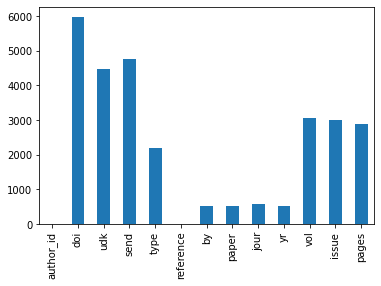

In [17]:
pub.isnull().sum().plot(kind='bar');

### 1.1.3 Pandas DataFrame with abstracts

In [18]:
absdb.db.head()

,abstract,keywords
mn_link,,
vyurv213,Увеличивающийся рост числа компонент суперкомп...,"расширение ULFM, контрольные точки, координиро..."
vyurv1,Рассматривается проблема выполнения длительных...,"параллельные вычисления, отказоустойчивость, к..."
vyurv46,"Рассматриваются вопросы, связанные с проведени...","параллельные вычисления, отказоустойчивость, к..."
ipmp2988,В данной работе рассмотрена модель для сопряже...,"модель Бринкмана, уравнения Навье-Стокса, своб..."
ipmp2939,Данное исследование связано с разработкой мате...,"математическое моделирование, решетка графена,..."


In [19]:
absdb.db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7597 entries, vyurv213 to vmumm4420
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   abstract  5609 non-null   object
 1   keywords  2525 non-null   object
dtypes: object(2)
memory usage: 178.1+ KB


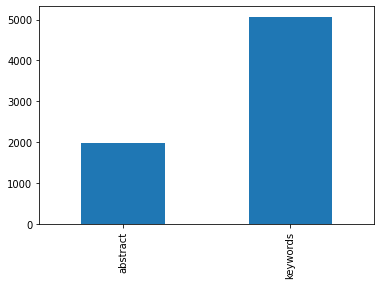

In [20]:
absdb.db.isnull().sum().plot(kind='bar');

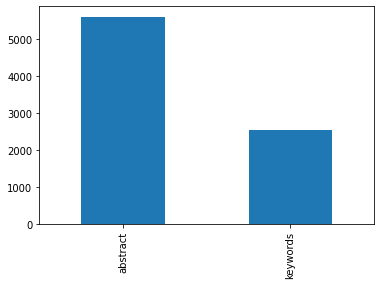

In [21]:
absdb.db.notnull().sum().plot(kind='bar');

In [22]:
for ind,val in enumerate(absdb.db[absdb.db.notnull()].index):
    if ind<10:
        print(val)

vyurv213
vyurv1
vyurv46
ipmp2988
ipmp2939
mm4253
danma122
vmp992
ipmp2783
ipmp2734


In [23]:
(pub.loc[list(absdb.db[absdb.db.notnull()].index)]['yr']>'2005').sum()

3302

In [24]:
print('1998'>'2005')
print('2008'>'2005')

False
True


## 1.2 Publications and their artefacts

In [25]:
print(f"Number of received papers is       {len(absdb.db.index)}")
print(f"Number of papers without abstracts {(absdb.db['abstract'].isnull()).sum()}")
print(f"Number of papers without keywords  {(absdb.db['keywords'].isnull()).sum()}")

Number of received papers is       7597
Number of papers without abstracts 1988
Number of papers without keywords  5072


Look through papers with artefacts 

In [26]:
w_year = 0
new_count = 0
old_count = 0
breaking_year = 2008
links_to_check = ['http://mi.mathnet.ru/'+mn_link for mn_link in absdb.db.index[absdb.db['abstract'].isnull()]]
for link, slink in zip(links_to_check, absdb.db.index[absdb.db['abstract'].isnull()]):
    year = pub.loc[slink,'yr']    
    if year is None:
        # print(f"year = {year}, name = {pub.loc[slink,'paper']}, link = {link} ")
        w_year+=1
    else:
        if int(year)>breaking_year:    
            new_count +=1
            print(f"year = {year},  link = {link}, name = {pub.loc[slink,'paper']}, ")
        else:
            old_count +=1
print(f"Numper of papers without abstracts without 'year' field is {w_year}")
print(f"Count of NEW papers without abstracts {new_count}")
print(f"Count of OLD papers without abstracts {old_count}")


year = 2021,  link = http://mi.mathnet.ru/mm4267, name = Памяти Николая Николаевича Калиткина, 
year = 2018,  link = http://mi.mathnet.ru/mm3935, name = Памяти Александра Сергеевича Холодова, 
year = 2017,  link = http://mi.mathnet.ru/crm91, name = Памяти Александра Сергеевича Холодова (11.10.1941 -- 05.11.2017), 
year = 2017,  link = http://mi.mathnet.ru/svmo668, name = Юрий Николаевич Дерюгин~--- к семидесятилетию со дня рождения, 
year = 2016,  link = http://mi.mathnet.ru/mm3685, name = Памяти О.\,М.~Белоцерковского, 
year = 2016,  link = http://mi.mathnet.ru/zvmmf10413, name = Памяти академика Российской академии наук Олега Михайловича Белоцерковского, 
year = 2016,  link = http://mi.mathnet.ru/zvmmf10334, name = Памяти профессора Алексея Владимировича Гулина (26.03.1942--27.03.2015), 
year = 2015,  link = http://mi.mathnet.ru/mm3614, name = Международная молодежная конференция &lt;&lt;Современные проблемы прикладной математики и информатики&gt;&gt;, 
year = 2015,  link = http://mi

In [27]:
pub.head()

,author_id,doi,udk,send,type,reference,by,paper,jour,yr,vol,issue,pages
vyurv213,"[113970, 148811, 22428]","<a class=""SLink"" href=""https://doi.org/10.1452...",004.052.3,20.11.2018,Статья,"А. А. Бондаренко, П. А. Ляхов, М. В. Якобовски...","А.~А.~Бондаренко, П.~А.~Ляхов, М.~В.~Якобовский",Координированное сохранение с журналированием ...,Вестн. ЮУрГУ. Сер. Выч. матем. информ.,2019,8,2,76--91
vyurv1,"[113970, 22428]","<a class=""SLink"" href=""https://doi.org/10.1452...",004.052.3,13.04.2015,Статья,"А. А. Бондаренко, М. В. Якобовский, “Моделиров...","А.~А.~Бондаренко, М.~В.~Якобовский",Моделирование отказов в высокопроизводительных...,Вестн. ЮУрГУ. Сер. Выч. матем. информ.,2015,4,3,5--12
vyurv46,"[113970, 22428]",None,004.052.3,05.08.2014,Статья,"А. А. Бондаренко, М. В. Якобовский, “Обеспечен...","А.~А.~Бондаренко, М.~В.~Якобовский",Обеспечение отказоустойчивости высокопроизводи...,Вестн. ЮУрГУ. Сер. Выч. матем. информ.,2014,3,3,20--36
ipmp2988,"[25339, 26426, 31779, 26427]",:https://doi.org/10.20948/prepr-2021-71,None,None,Препринт,"С. В. Поляков, М. А. Трапезникова, А. Г. Чурба...","С.~В.~Поляков, М.~А.~Трапезникова, А.~Г.~Чурба...",Расчет несжимаемых течений в системе &lt;&lt;п...,Препринты ИПМ им.~М.~В.~Келдыша,2021,None,None,None
ipmp2939,"[101245, 25339, 163334]",:https://doi.org/10.20948/prepr-2021-21,None,None,Препринт,"Б. Г. Фрейнкман, С. В. Поляков, И. О. Толстов,...","Б.~Г.~Фрейнкман, С.~В.~Поляков, И.~О.~Толстов",Расчет основного состояния электрона в неоднор...,Препринты ИПМ им.~М.~В.~Келдыша,2021,None,None,None


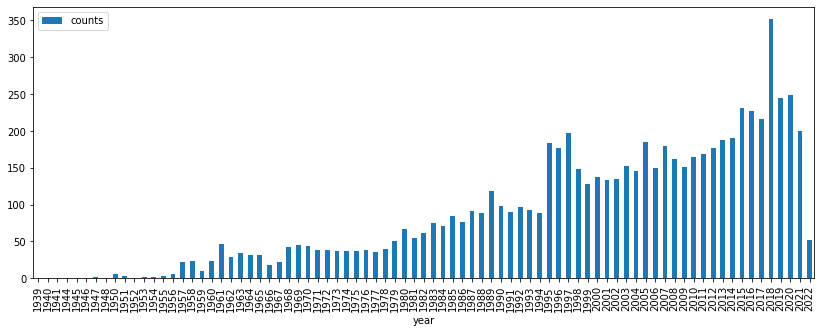

In [28]:

# pub.value_counts(['yr']).sort_values().plot(kind='bar')
# print(pub.value_counts(['yr']).head(100).sort_values().index)

# plt.xticks(y_pos, bars, rotation=90)
# use('ggplot')
t = pub.groupby(['yr']).size().reset_index(name='counts')
t.plot('yr','counts',kind='bar',figsize=(14,5))
plt.xlabel("year")
plt.xticks()
plt.show()

In [29]:

# print(t.head(20))
print(t.iloc[list(range(1,81,5))].head(20))

      yr  counts
1   1940       1
6   1947       2
11  1953       2
16  1958      24
21  1963      34
26  1968      42
31  1973      37
36  1978      40
41  1983      75
46  1988      88
51  1993      92
56  1998     148
61  2003     152
66  2008     162
71  2013     188
76  2018     351


In [30]:
# import nltk 
# nltk.download('stopwords')
# stop_words = nltk.corpus.stopwords.words('russian')

In [31]:
# import pickle
# filename = '../data/ru_stop_words.pkl'
# with open(filename,'wb') as outp:
#     pickle.dump(stop_words, outp, pickle.HIGHEST_PROTOCOL)

# filename = '../data/mnid_author_dict.pkl'    
# with open(filename,'wb') as outp:
#     pickle.dump(authors_dict2, outp, pickle.HIGHEST_PROTOCOL)

In [32]:
from model import Model 
mod = Model()

In [33]:
t = mod.get_model_response('алгоритм поиска')
print(t)

Expert: Кочкаров Азрет Ахматович, rating: 1.75
Expert: Кочкаров Расул Ахматович, rating: 1.75
Expert: Бондарев Александр Евгеньевич, rating: 0.59
Expert: Жуков Виктор Тимофеевич, rating: 0.51
Expert: Феодоритова Ольга Борисовна, rating: 0.51
-----------
Список работ с наибольшим рейтингом:
А. А. Кочкаров, Р. А. Кочкаров, “Предфрактальные графы в проектировании и анализе сложных структур”, Препринты ИПМ им. М. В. Келдыша, 2003, 010, 21 с.
А. А. Кочкаров, Р. А. Кочкаров, “Параллельный алгоритм поиска кратчайшего пути на предфрактальном графе”, Ж. вычисл. матем. и матем. физ., 44:6 (2004), 1147–1152; Comput. Math. Math. Phys., 44:6 (2004), 1088–1092
Г. Г. Еленин, Ю. В. Трощиев, “Численный метод ветвления в сложных точках бифуркации при продолжении по параметру”, Матем. моделирование, 3:7 (1991), 101–110
Л. С. Корухова, Э. З. Любимский, В. В. Малышко, “Программные средства реализации ассоциативного планирования”, Препринты ИПМ им. М. В. Келдыша, 2002, 010, 29 с.
Е. Л. Карташева, А. С. Минк

In [34]:
t = mod.get_model_response('алгоритм алгоритм поиска')
print(t)

Expert: Кочкаров Азрет Ахматович, rating: 1.75
Expert: Кочкаров Расул Ахматович, rating: 1.75
Expert: Бондарев Александр Евгеньевич, rating: 0.59
Expert: Жуков Виктор Тимофеевич, rating: 0.51
Expert: Феодоритова Ольга Борисовна, rating: 0.51
-----------
Список работ с наибольшим рейтингом:
А. А. Кочкаров, Р. А. Кочкаров, “Предфрактальные графы в проектировании и анализе сложных структур”, Препринты ИПМ им. М. В. Келдыша, 2003, 010, 21 с.
А. А. Кочкаров, Р. А. Кочкаров, “Параллельный алгоритм поиска кратчайшего пути на предфрактальном графе”, Ж. вычисл. матем. и матем. физ., 44:6 (2004), 1147–1152; Comput. Math. Math. Phys., 44:6 (2004), 1088–1092
Г. Г. Еленин, Ю. В. Трощиев, “Численный метод ветвления в сложных точках бифуркации при продолжении по параметру”, Матем. моделирование, 3:7 (1991), 101–110
Л. С. Корухова, Э. З. Любимский, В. В. Малышко, “Программные средства реализации ассоциативного планирования”, Препринты ИПМ им. М. В. Келдыша, 2002, 010, 29 с.
К. С. Зипа, А. В. Игнатенко

In [35]:
t = mod.get_model_response('алгоритм поиска алгоритм')
print(t)

Expert: Елизарова Татьяна Геннадьевна, rating: 0.73
Expert: Устюгов Сергей Дмитриевич, rating: 0.55
Expert: Григорьев Сергей Константинович, rating: 0.43
Expert: Рябенький Виктор Соломонович, rating: 0.39
Expert: Брюно Александр Дмитриевич, rating: 0.38
-----------
Список работ с наибольшим рейтингом:
А. Ю. Круковский, В. Г. Новиков, И. П. Цыгвинцев, “Численные алгоритмы для решения трехмерных нестационарных задач магнитной гидродинамики”, Препринты ИПМ им. М. В. Келдыша, 2014, 006, 20 с.
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
М. В. Якобовский, С. К. Григорьев, “Алгоритм гарантированной генерации тетраэдральной сетки проекционным методом”, Препринты ИПМ им. М. В. Келдыша, 2018, 109, 18 с.
А. А. Алексашкина, А. Н. Костромин, Ю. В. Нестеренко, “О быстром алгоритме вычисления преобразования Фурье”, Вестн. Моск. ун-та. Сер. 1. 

In [36]:
t = mod.get_model_response('параллельный алгоритм поиска')
print(t)

Expert: Кочкаров Азрет Ахматович, rating: 2.81
Expert: Кочкаров Расул Ахматович, rating: 2.81
Expert: Головченко Евдокия Николаевна, rating: 1.44
Expert: Жуков Виктор Тимофеевич, rating: 1.35
Expert: Новикова Наталия Дмитриевна, rating: 1.35
-----------
Список работ с наибольшим рейтингом:
А. А. Кочкаров, Р. А. Кочкаров, “Предфрактальные графы в проектировании и анализе сложных структур”, Препринты ИПМ им. М. В. Келдыша, 2003, 010, 21 с.
А. А. Кочкаров, Р. А. Кочкаров, “Параллельный алгоритм поиска кратчайшего пути на предфрактальном графе”, Ж. вычисл. матем. и матем. физ., 44:6 (2004), 1147–1152; Comput. Math. Math. Phys., 44:6 (2004), 1088–1092
А. А. Кочкаров, Р. А. Кочкаров, “Параллельные алгоритмы на предфрактальных графах”, Препринты ИПМ им. М. В. Келдыша, 2003, 084, 18 с.
А. А. Кулешов, Е. Е. Мышецкая, “Математическое моделирование лесных пожаров с применением многопроцессорных ЭВМ”, Матем. моделирование, 20:11 (2008), 28–34; Math. Models Comput. Simul., 1:5 (2009), 629–634
А. Г.

In [37]:
t = mod.get_model_response('параллельный поиска алгоритм')
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 2.37
Expert: Новикова Наталия Дмитриевна, rating: 2.37
Expert: Феодоритова Ольга Борисовна, rating: 2.37
Expert: Четверушкин Борис Николаевич, rating: 0.94
Expert: Головченко Евдокия Николаевна, rating: 0.78
-----------
Список работ с наибольшим рейтингом:
В. Т. Жуков, Н. Д. Новикова, О. Б. Феодоритова, “Итерационный метод для конечно-элементных схем высокого порядка. Часть III. Некоторые аспекты параллельной реализации”, Препринты ИПМ им. М. В. Келдыша, 2003, 078, 21 с.
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
С. В. Андреев, А. Е. Бондарев, Т. Н. Михайлова, И. Г. Рыжова, “Реализация параллельного алгоритма решения задач оптимизационного анализа”, Препринты ИПМ им. М. В. Келдыша, 2014, 101, 11 с.
Е. Н. Головченко, Е. Ю. Дорофеева, В. А. Гасилов, М. В. Якобовский, “Вычислительный экспер

In [38]:
t = mod.get_model_response('алгоритм параллельный поиска')
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 1.77
Expert: Новикова Наталия Дмитриевна, rating: 1.77
Expert: Феодоритова Ольга Борисовна, rating: 1.77
Expert: Кочкаров Азрет Ахматович, rating: 1.39
Expert: Кочкаров Расул Ахматович, rating: 1.39
-----------
Список работ с наибольшим рейтингом:
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
Е. Н. Головченко, Е. Ю. Дорофеева, В. А. Гасилов, М. В. Якобовский, “Вычислительный эксперимент по оценке качества алгоритмов параллельной декомпозиции больших сеток”, Препринты ИПМ им. М. В. Келдыша, 2013, 007, 32 с.
А. А. Кочкаров, Р. А. Кочкаров, “Предфрактальные графы в проектировании и анализе сложных структур”, Препринты ИПМ им. М. В. Келдыша, 2003, 010, 21 с.
Е. Н. Головченко, “Динамическая балансировка с помощью пакета параллельной декомпозиции GridSpiderPar”, Матем. моделирование, 34:4 (2022),

In [39]:
t = mod.get_model_response('алгоритм поиска параллельный')
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 2.37
Expert: Новикова Наталия Дмитриевна, rating: 2.37
Expert: Феодоритова Ольга Борисовна, rating: 2.37
Expert: Четверушкин Борис Николаевич, rating: 0.94
Expert: Головченко Евдокия Николаевна, rating: 0.78
-----------
Список работ с наибольшим рейтингом:
В. Т. Жуков, Н. Д. Новикова, О. Б. Феодоритова, “Итерационный метод для конечно-элементных схем высокого порядка. Часть III. Некоторые аспекты параллельной реализации”, Препринты ИПМ им. М. В. Келдыша, 2003, 078, 21 с.
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
С. В. Андреев, А. Е. Бондарев, Т. Н. Михайлова, И. Г. Рыжова, “Реализация параллельного алгоритма решения задач оптимизационного анализа”, Препринты ИПМ им. М. В. Келдыша, 2014, 101, 11 с.
Е. Н. Головченко, Е. Ю. Дорофеева, В. А. Гасилов, М. В. Якобовский, “Вычислительный экспер

In [40]:
t = mod.get_model_response('поиска параллельный алгоритм') #3-1-2
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 1.69
Expert: Новикова Наталия Дмитриевна, rating: 1.69
Expert: Феодоритова Ольга Борисовна, rating: 1.69
Expert: Головченко Евдокия Николаевна, rating: 1.44
Expert: Кочкаров Азрет Ахматович, rating: 1.29
-----------
Список работ с наибольшим рейтингом:
А. А. Кулешов, Е. Е. Мышецкая, “Математическое моделирование лесных пожаров с применением многопроцессорных ЭВМ”, Матем. моделирование, 20:11 (2008), 28–34; Math. Models Comput. Simul., 1:5 (2009), 629–634
А. Г. Аксенов, А. В. Бабаков, В. М. Чечеткин, “Математическое моделирование вихревых структур в быстровращающихся астрофизических объектах”, Ж. вычисл. матем. и матем. физ., 58:8 (2018), 182–188; Comput. Math. Math. Phys., 58:8 (2018), 1287–1293
В. Т. Жуков, Н. Д. Новикова, О. Б. Феодоритова, “Итерационный метод для конечно-элементных схем высокого порядка. Часть III. Некоторые аспекты параллельной реализации”, Препринты ИПМ им. М. В. Келдыша, 2003, 078, 21 с.
A. Я. Калинов, С. А. Климов, М. А. 

In [41]:
t = mod.get_model_response('поиска алгоритм параллельный')
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 1.77
Expert: Новикова Наталия Дмитриевна, rating: 1.77
Expert: Феодоритова Ольга Борисовна, rating: 1.77
Expert: Стрелков Сергей Александрович, rating: 1.09
Expert: Сушкевич Тамара Алексеевна, rating: 1.09
-----------
Список работ с наибольшим рейтингом:
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
Е. Н. Головченко, Е. Ю. Дорофеева, В. А. Гасилов, М. В. Якобовский, “Вычислительный эксперимент по оценке качества алгоритмов параллельной декомпозиции больших сеток”, Препринты ИПМ им. М. В. Келдыша, 2013, 007, 32 с.
Е. Н. Головченко, “Динамическая балансировка с помощью пакета параллельной декомпозиции GridSpiderPar”, Матем. моделирование, 34:4 (2022), 59–69
В. Т. Жуков, Н. Д. Новикова, О. Б. Феодоритова, “Итерационный метод для конечно-элементных схем высокого порядка. Часть III. Некоторые ас

In [42]:
t = mod.get_model_response('параллельный алгоритм')
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 1.69
Expert: Новикова Наталия Дмитриевна, rating: 1.69
Expert: Феодоритова Ольга Борисовна, rating: 1.69
Expert: Головченко Евдокия Николаевна, rating: 1.44
Expert: Кочкаров Азрет Ахматович, rating: 1.29
-----------
Список работ с наибольшим рейтингом:
А. А. Кулешов, Е. Е. Мышецкая, “Математическое моделирование лесных пожаров с применением многопроцессорных ЭВМ”, Матем. моделирование, 20:11 (2008), 28–34; Math. Models Comput. Simul., 1:5 (2009), 629–634
А. Г. Аксенов, А. В. Бабаков, В. М. Чечеткин, “Математическое моделирование вихревых структур в быстровращающихся астрофизических объектах”, Ж. вычисл. матем. и матем. физ., 58:8 (2018), 182–188; Comput. Math. Math. Phys., 58:8 (2018), 1287–1293
В. Т. Жуков, Н. Д. Новикова, О. Б. Феодоритова, “Итерационный метод для конечно-элементных схем высокого порядка. Часть III. Некоторые аспекты параллельной реализации”, Препринты ИПМ им. М. В. Келдыша, 2003, 078, 21 с.
A. Я. Калинов, С. А. Климов, М. А. 

In [43]:
t = mod.get_model_response('алгоритм параллельный')
print(t)

Expert: Жуков Виктор Тимофеевич, rating: 1.77
Expert: Новикова Наталия Дмитриевна, rating: 1.77
Expert: Феодоритова Ольга Борисовна, rating: 1.77
Expert: Стрелков Сергей Александрович, rating: 1.09
Expert: Сушкевич Тамара Алексеевна, rating: 1.09
-----------
Список работ с наибольшим рейтингом:
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
Е. Н. Головченко, Е. Ю. Дорофеева, В. А. Гасилов, М. В. Якобовский, “Вычислительный эксперимент по оценке качества алгоритмов параллельной декомпозиции больших сеток”, Препринты ИПМ им. М. В. Келдыша, 2013, 007, 32 с.
Е. Н. Головченко, “Динамическая балансировка с помощью пакета параллельной декомпозиции GridSpiderPar”, Матем. моделирование, 34:4 (2022), 59–69
В. Т. Жуков, Н. Д. Новикова, О. Б. Феодоритова, “Итерационный метод для конечно-элементных схем высокого порядка. Часть III. Некоторые ас

In [44]:
t = mod.get_model_response('алгоритм поиска')
print(t)

Expert: Кочкаров Азрет Ахматович, rating: 1.75
Expert: Кочкаров Расул Ахматович, rating: 1.75
Expert: Бондарев Александр Евгеньевич, rating: 0.59
Expert: Жуков Виктор Тимофеевич, rating: 0.51
Expert: Феодоритова Ольга Борисовна, rating: 0.51
-----------
Список работ с наибольшим рейтингом:
А. А. Кочкаров, Р. А. Кочкаров, “Предфрактальные графы в проектировании и анализе сложных структур”, Препринты ИПМ им. М. В. Келдыша, 2003, 010, 21 с.
А. А. Кочкаров, Р. А. Кочкаров, “Параллельный алгоритм поиска кратчайшего пути на предфрактальном графе”, Ж. вычисл. матем. и матем. физ., 44:6 (2004), 1147–1152; Comput. Math. Math. Phys., 44:6 (2004), 1088–1092
Г. Г. Еленин, Ю. В. Трощиев, “Численный метод ветвления в сложных точках бифуркации при продолжении по параметру”, Матем. моделирование, 3:7 (1991), 101–110
Л. С. Корухова, Э. З. Любимский, В. В. Малышко, “Программные средства реализации ассоциативного планирования”, Препринты ИПМ им. М. В. Келдыша, 2002, 010, 29 с.
Е. Л. Карташева, А. С. Минк

In [45]:
t = mod.get_model_response('поиска алгоритм')
print(t)

Expert: Елизарова Татьяна Геннадьевна, rating: 0.73
Expert: Устюгов Сергей Дмитриевич, rating: 0.55
Expert: Григорьев Сергей Константинович, rating: 0.43
Expert: Рябенький Виктор Соломонович, rating: 0.39
Expert: Брюно Александр Дмитриевич, rating: 0.38
-----------
Список работ с наибольшим рейтингом:
А. Ю. Круковский, В. Г. Новиков, И. П. Цыгвинцев, “Численные алгоритмы для решения трехмерных нестационарных задач магнитной гидродинамики”, Препринты ИПМ им. М. В. Келдыша, 2014, 006, 20 с.
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
М. В. Якобовский, С. К. Григорьев, “Алгоритм гарантированной генерации тетраэдральной сетки проекционным методом”, Препринты ИПМ им. М. В. Келдыша, 2018, 109, 18 с.
А. А. Алексашкина, А. Н. Костромин, Ю. В. Нестеренко, “О быстром алгоритме вычисления преобразования Фурье”, Вестн. Моск. ун-та. Сер. 1. 

In [46]:
t = mod.get_model_response('параллельный поиска')
print(t)

Expert: Андрианов Александр Николаевич, rating: 1.4
Expert: Ефимкин Кирилл Николаевич, rating: 1.12
Expert: Жуков Виктор Тимофеевич, rating: 1.04
Expert: Новикова Наталия Дмитриевна, rating: 1.04
Expert: Феодоритова Ольга Борисовна, rating: 1.04
-----------
Список работ с наибольшим рейтингом:
Г. Г. Еленин, Ю. В. Трощиев, “Численный метод ветвления в сложных точках бифуркации при продолжении по параметру”, Матем. моделирование, 3:7 (1991), 101–110
А. А. Кочкаров, Р. А. Кочкаров, “Предфрактальные графы в проектировании и анализе сложных структур”, Препринты ИПМ им. М. В. Келдыша, 2003, 010, 21 с.
А. Н. Андрианов, К. Н. Ефимкин, “Метод частиц в ячейках: учет в параллельной реализации взаимодействия частиц”, Препринты ИПМ им. М. В. Келдыша, 2016, 071, 16 с.
А. А. Кочкаров, Р. А. Кочкаров, “Параллельный алгоритм поиска кратчайшего пути на предфрактальном графе”, Ж. вычисл. матем. и матем. физ., 44:6 (2004), 1147–1152; Comput. Math. Math. Phys., 44:6 (2004), 1088–1092
Н. П. Тучкова, А. А. М

In [47]:
t = mod.get_model_response('поиска параллельный')
print(t)

Expert: Андрианов Александр Николаевич, rating: 1.81
Expert: Ефимкин Кирилл Николаевич, rating: 1.32
Expert: Жуков Виктор Тимофеевич, rating: 0.79
Expert: Новикова Наталия Дмитриевна, rating: 0.79
Expert: Феодоритова Ольга Борисовна, rating: 0.79
-----------
Список работ с наибольшим рейтингом:
А. Н. Андрианов, К. Н. Ефимкин, “Метод частиц в ячейках: учет в параллельной реализации взаимодействия частиц”, Препринты ИПМ им. М. В. Келдыша, 2016, 071, 16 с.
П. В. Кайгородов, О. А. Кузнецов, “Адаптация схемы Роу–Ошера для компьютеров с массивно-параллельной архитектурой”, Препринты ИПМ им. М. В. Келдыша, 2002, 059, 28 с.
А. В. Горобец, “Параллельная технология численного моделирования задач газовой динамики алгоритмами повышенной точности”, Ж. вычисл. матем. и матем. физ., 55:4 (2015), 641–652; Comput. Math. Math. Phys., 55:4 (2015), 638–649
А. Н. Андрианов, “Применение языка Норма для решения задач на вложенных сетках”, Выч. мет. программирование, 3:2 (2002), 1–10
В. Т. Жуков, Н. Д. Новико

In [48]:
t = mod.get_model_response('параллельный')
print(t)

Expert: Андрианов Александр Николаевич, rating: 1.81
Expert: Ефимкин Кирилл Николаевич, rating: 1.32
Expert: Жуков Виктор Тимофеевич, rating: 0.79
Expert: Новикова Наталия Дмитриевна, rating: 0.79
Expert: Феодоритова Ольга Борисовна, rating: 0.79
-----------
Список работ с наибольшим рейтингом:
А. Н. Андрианов, К. Н. Ефимкин, “Метод частиц в ячейках: учет в параллельной реализации взаимодействия частиц”, Препринты ИПМ им. М. В. Келдыша, 2016, 071, 16 с.
П. В. Кайгородов, О. А. Кузнецов, “Адаптация схемы Роу–Ошера для компьютеров с массивно-параллельной архитектурой”, Препринты ИПМ им. М. В. Келдыша, 2002, 059, 28 с.
А. В. Горобец, “Параллельная технология численного моделирования задач газовой динамики алгоритмами повышенной точности”, Ж. вычисл. матем. и матем. физ., 55:4 (2015), 641–652; Comput. Math. Math. Phys., 55:4 (2015), 638–649
А. Н. Андрианов, “Применение языка Норма для решения задач на вложенных сетках”, Выч. мет. программирование, 3:2 (2002), 1–10
В. Т. Жуков, Н. Д. Новико

In [49]:
t = mod.get_model_response('алгоритм')
print(t)

Expert: Елизарова Татьяна Геннадьевна, rating: 0.73
Expert: Устюгов Сергей Дмитриевич, rating: 0.55
Expert: Григорьев Сергей Константинович, rating: 0.43
Expert: Рябенький Виктор Соломонович, rating: 0.39
Expert: Брюно Александр Дмитриевич, rating: 0.38
-----------
Список работ с наибольшим рейтингом:
А. Ю. Круковский, В. Г. Новиков, И. П. Цыгвинцев, “Численные алгоритмы для решения трехмерных нестационарных задач магнитной гидродинамики”, Препринты ИПМ им. М. В. Келдыша, 2014, 006, 20 с.
Ю. М. Нечепуренко, “Полиномиально устойчивый быстрый параллельный алгоритм для трёхдиагональных систем”, Ж. вычисл. матем. и матем. физ., 26:7 (1986), 963–969; Comput. Math. Math. Phys., 26:4 (1986), 1–5
М. В. Якобовский, С. К. Григорьев, “Алгоритм гарантированной генерации тетраэдральной сетки проекционным методом”, Препринты ИПМ им. М. В. Келдыша, 2018, 109, 18 с.
А. А. Алексашкина, А. Н. Костромин, Ю. В. Нестеренко, “О быстром алгоритме вычисления преобразования Фурье”, Вестн. Моск. ун-та. Сер. 1. 

In [50]:
t = mod.get_model_response('поиска')
print(t)

Expert: Кочкаров Азрет Ахматович, rating: 0.66
Expert: Кочкаров Расул Ахматович, rating: 0.66
Expert: Трощиев Юрий Витальевич, rating: 0.4
Expert: Сивакова Татьяна Владимировна, rating: 0.32
Expert: Судаков Владимир Анатольевич, rating: 0.32
-----------
Список работ с наибольшим рейтингом:
Г. Г. Еленин, Ю. В. Трощиев, “Численный метод ветвления в сложных точках бифуркации при продолжении по параметру”, Матем. моделирование, 3:7 (1991), 101–110
Н. П. Тучкова, А. А. Муромский, А. В. Ермаков, “Управление информацией с использованием живых публикаций”, Препринты ИПМ им. М. В. Келдыша, 2016, 067, 14 с.
С. В. Андреев, А. Е. Бондарев, А. В. Бондаренко, Ю. В. Визильтер, В. А. Галактионов, А. В. Гудков, С. Ю. Желтов, В. Т. Жуков, Е. Б. Иловайская, В. А. Князь, К. В. Мануковский, Н. Д. Новикова, М. В. Ососков, Н. Ж. Силаев, О. Б. Феодоритова, “Организация поиска оптимальной формы узла лопастей энергоустановки”, Препринты ИПМ им. М. В. Келдыша, 2016, 074, 21 с.
А. А. Кочкаров, Р. А. Кочкаров, “Пр

In [51]:
mod.get_model_response('суперкомпьютерное моделирование газодинамический')

'Expert: Четверушкин Борис Николаевич, rating: 1.68\nExpert: Афендиков Андрей Леонидович, rating: 0.94\nExpert: Плёнкин Андрей Валерьевич, rating: 0.94\nExpert: Абалакин Илья Владимирович, rating: 0.73\nExpert: Елизарова Татьяна Геннадьевна, rating: 0.62\n-----------\nСписок работ с наибольшим рейтингом:\nИ. С. Барская, С. И. Мухин, В. М. Чечеткин, “Математическое моделирование равновесных конфигураций самогравитирующего газа”, Препринты ИПМ им. М. В. Келдыша, 2006, 041, 23 с.\nА. Л. Афендиков, К. Д. Меркулов, А. В. Плёнкин, “Сравнительный анализ подходов к численному моделированию газодинамических течений на двухуровневых адаптивных расчетных сетках”, Препринты ИПМ им. М. В. Келдыша, 2015, 095, 24 с.\nТ. Г. Елизарова, Б. Н. Четверушкин, “Кинетические алгоритмы для расчёта газодинамических течений”, Ж. вычисл. матем. и матем. физ., 25:10 (1985), 1526–1533; Comput. Math. Math. Phys., 25:5 (1985), 164–169\nГ. Г. Малинецкий, М. Е. Степанцов, “Применение клеточных автоматов для моделирован

In [52]:
print(mod.audb.db['21356']['ipmp221'])

{'year': '2010', 'nrf': 9}


In [53]:
print(len(mod.audb.db['21356']))

25


In [55]:
mod.get_authors_last_papers(',Павловский..?')

Павловский Владимир Владимирович
павловский
павловский
Павловский Владимир Евгеньевич
павловский
павловский
Павловский Евгений Владимирович
павловский
павловский


'На данный момент у автора: Павловский Владимир Владимирович учтено 7 статьи. Вот некоторые из них:\nВ. В. Павловский, Е. В. Павловский, А. В. Подопросветов, “АвтоНива: развитие системы моделирования движения”, Препринты ИПМ им. М. В. Келдыша, 2021, 105, 19 с.\nВ. В. Павловский, А. В. Подопросветов, Е. В. Павловский, “Методы и алгоритмы локальной навигации автономных автомобилей на многополосной дороге, архитектура симуляции”, Препринты ИПМ им. М. В. Келдыша, 2020, 127, 17 с.\nВ. Е. Павловский, А. К. Платонов, А. П. Алисейчик, И. А. Орлов, В. В. Павловский, А. А. Птахин, “Биомехатронный комплекс нейрореабилитации — концепция, конструкция, модели и управление”, Препринты ИПМ им. М. В. Келдыша, 2014, 111, 19 с.\nВ. Е. Павловский, В. В. Павловский, “Модульная микроконтроллерная система управления роботами РОБОКОН-1”, Препринты ИПМ им. М. В. Келдыша,  2012,086, 32 стр.\nВ. Е. Павловский, А. К. Платонов, Н. С. Сербенюк, В. С. Ярошевский, А. П. Алисейчик, И. А. Орлов, В. В. Павловский, Л. Ми